# Neural Network in TensorFlow

## Import libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import NeuralNetwork class from neural_network.py
from neural_network import NeuralNetwork

## Load and preprocess hand-written digit data

- Reshape image data to have dimensions (n_samples, n_pixels_x * n_pixels_y).
- Divide pixel values by 255 to scale between 0 and 1.
- Convert y from class number to one-hot representation. Dimensions: (n_samples) --> (n_samples, n_classes).

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Compute number of pixels in each image
n_samples, y_pixels, x_pixels = x_train.shape
n_pixels = y_pixels * x_pixels
orig_size = (x_pixels, y_pixels)

# Reshape image data, scale pixel values
x_train = x_train.reshape(-1, n_pixels)/255
x_test = x_test.reshape(-1, n_pixels)/255

# Convert y from class # to one-hot representation
y_train = tf.keras.utils.to_categorical(y_train) # (n_samples, 10)
y_test = tf.keras.utils.to_categorical(y_test)

## Examine data

In [3]:
def plot_images(x, y, orig_size, inds, predictions=None):
    """ Plot images from index numbers. Predictions are shown in subplot title,
        colored green if classified correctly and red if classified incorrectly.
            Input:
                x: image data (n_samples, n_pixels)
                y: one-hot representation of classes for data in x
                orig_size: tuple for reshaping image data (n_pixels_x, n_pixels_y)
                inds: list of indices of images to display
                predictions: model predictions; if empty, y treated as predictions
    """
    
    # Convert y from one-hot to class #
    y = np.argmax(y, axis=1)
    
    # Extract original size of image so it can be reshaped
    x_pixels, y_pixels = orig_size
    
    # If no predictions provided, treat y as predictions
    if predictions is None:
        predictions = y
    
    # If just one index passed, plot separately
    if type(inds)==int:
        plt.figure(figsize=(2, 2))

        plt.imshow(x[inds].reshape((y_pixels, x_pixels)), cmap='binary')
        plt.xticks([])
        plt.yticks([])
            # Show label in subplot title, color according to accuracy
        if y[inds] == predictions[inds]: # Correct
            col = 'g'
        else:
            col = 'r'
        plt.title(predictions[inds], color=col)
        
        return
    
    # Number of rows and columns for subplots
    n_cols = 5
    n_rows = int(np.ceil(len(inds) / n_cols))

    # Generate plot
    plt.figure(figsize=(2*n_cols, 2*n_rows))
    for subp, ind in enumerate(inds):
        plt.subplot(n_rows, n_cols, subp+1)
        plt.imshow(x[ind].reshape((y_pixels, x_pixels)), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        # Show label in subplot title, color according to accuracy
        if y[ind] == predictions[ind]: # Correct
            col = 'g'
        else:
            col = 'r'
        plt.title(predictions[ind], color=col)


In [4]:
def plot_random_images(x, y, orig_size, num_images, predictions=None):
    """ Selects image indices randomly and passes images to be plotted by plot_images
            Input:
                x: image data (n_samples, n_pixels)
                y: one-hot representation of classes for data in x
                orig_size: tuple for reshaping image data (n_pixels_x, n_pixels_y)
                num_images: number of images to display
                predictions: model predictions; if empty, y treated as predictions
    """
    
    # Select random indices without replacement
    image_inds = np.random.choice(np.arange(0, x.shape[0]), size=num_images, replace=False)
    
    # Plot images
    plot_images(x, y, orig_size, image_inds, predictions)

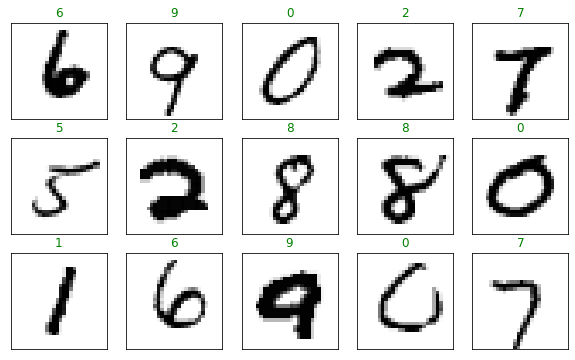

In [5]:
# Plot 15 randomly selected images
plot_random_images(x_train, y_train, orig_size, 15)

## Initialize and train neural network

In [6]:
net = NeuralNetwork([n_pixels, 128, 128, 10])
net.info()

Input Features: 784
Number of Classes: 10
Hidden Layers:
--------------
Layer 1, Units 128
Layer 2, Units 128
--------------
Number of parameters: 118282


In [7]:
# Set network hyperparameters
batch_size = 120
epochs = 8
steps_per_epoch = int(x_train.shape[0]/batch_size)
lr = 3e-3

In [8]:
# Train network
history = net.train(x_train, y_train,
                    x_test, y_test,
                    epochs, steps_per_epoch,
                    batch_size, lr)

Epoch 0...........Val acc: 0.8227
Epoch 1...........Val acc: 0.8513
Epoch 2...........Val acc: 0.8673
Epoch 3...........Val acc: 0.8753
Epoch 4...........Val acc: 0.882
Epoch 5...........Val acc: 0.8834
Epoch 6...........Val acc: 0.8879
Epoch 7...........Val acc: 0.8901


## Examine results

In [9]:
def plot_results(history):
    """ Plot model loss and accuracy with each epoch
            Input: model history, output from network.train()
    """
    
    # Generate figure
    plt.figure(figsize=(12, 4))
    
    epochs = np.arange(len(history['val_loss']))
    
    # Plot model loss for training and testing set
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['val_loss'], label = 'Test set loss')
    plt.plot(epochs, history['train_loss'], label = 'Training set loss')
    plt.xticks(epochs)
    plt.title('Model loss by epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot accuracy of predictions on test set
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['val_acc'], label='Val Acc')
    plt.xticks(epochs)
    plt.title('Test set accuracy by epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Test set accuracy')

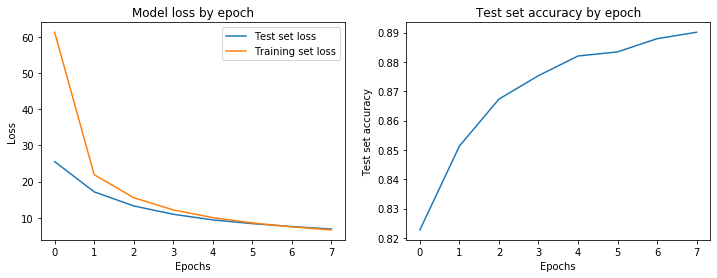

In [10]:
plot_results(history)

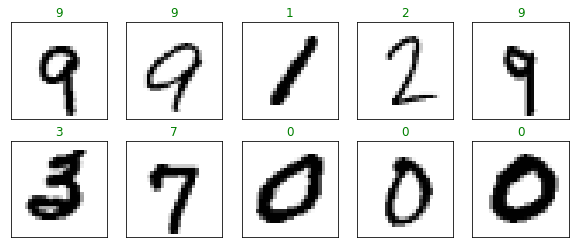

In [11]:
# Make predictions with model to compare to y_test
preds = net.predict(x_test).numpy()
y_classes = np.argmax(y_test, axis = 1)

# Plot random sampling of images and predictions
plot_random_images(x_test, y_test, orig_size, 10, preds)

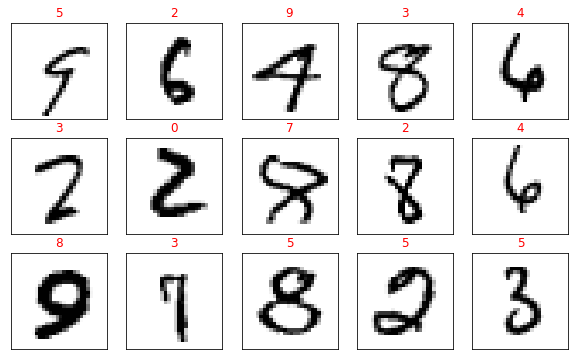

In [12]:
# Find indices of correct and incorrect samples
correct = preds == y_classes
incorrect = preds != y_classes

# Look at incorrect classifications
incorrect_ind = np.argwhere(incorrect).squeeze()
x_incorrect = x_test[incorrect_ind, :]
y_incorrect = y_test[incorrect_ind, :]
preds_incorrect = preds[incorrect_ind]

plot_random_images(x_incorrect, y_incorrect, orig_size, 15, preds_incorrect)